<a href="https://colab.research.google.com/github/dddonghwa/deep-learning-with-python/blob/main/ch3_02_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###cf. Keras 네트워크 시각화하기 [링크](https://dacon.io/codeshare/4199)

```
model.summary()
plot_model(model, show_shapes=True, to_file='name.png')
```

## 3.5 뉴스 기사 분류 : 다중 분류 문제
### 3.5.1 로이터 데이터셋
짧은 뉴스 기사와 토픽의 집합  
46개의 토픽, 각 토픽당 최소 10개의 샘플 데이터

In [18]:
# 코드 3-12
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
word_idx = reuters.get_word_index()
reverse_word_idx = dict(
    [(value, key) for (key,value) in word_idx.items()]
)
# print(reverse_word_idx)
decoded_review = " ".join(
    [reverse_word_idx.get(i-3, "?") for i in train_data[0]]
)
print(decoded_review)

565248/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [19]:
# 3-14 데이터 인코딩하기

def vectorize_sequence(sequences, dimension=10000):
  mat = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    mat[i, seq] = 1.
  return mat

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [5]:
print(x_train.shape, x_test.shape)

(8982, 10000) (2246, 10000)


In [24]:
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

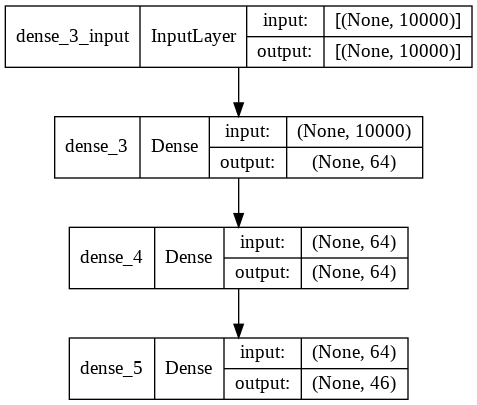

In [8]:
# 코드 3-15 모델 정의하기
from keras import models, layers
from tensorflow.keras.utils import plot_model

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

plot_model(model, show_shapes=True)

In [9]:
# 코드 3-16 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 코드 3-17 검증 세트 준비하기
x_val = x_train[:1000, :]
partial_x_train = x_train[1000:,:]
y_val = y_train[:1000, :]
partial_y_train = y_train[1000:,:]

In [11]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

model.evaluate(x_test, y_test) # test_acc : 0.7836152911186218]

Epoch 1/10
16/16 [==============================] - 2s 62ms/step - loss: 2.5784 - accuracy: 0.5542 - val_loss: 1.6834 - val_accuracy: 0.6680
Epoch 2/10
16/16 [==============================] - 1s 46ms/step - loss: 1.3637 - accuracy: 0.7166 - val_loss: 1.2868 - val_accuracy: 0.7280
Epoch 3/10
16/16 [==============================] - 1s 44ms/step - loss: 1.0215 - accuracy: 0.7789 - val_loss: 1.1100 - val_accuracy: 0.7530
Epoch 4/10
16/16 [==============================] - 1s 46ms/step - loss: 0.8150 - accuracy: 0.8208 - val_loss: 1.0170 - val_accuracy: 0.7800
Epoch 5/10
16/16 [==============================] - 1s 45ms/step - loss: 0.6541 - accuracy: 0.8579 - val_loss: 0.9507 - val_accuracy: 0.8010
Epoch 6/10
16/16 [==============================] - 1s 44ms/step - loss: 0.5280 - accuracy: 0.8894 - val_loss: 0.9150 - val_accuracy: 0.8020
Epoch 7/10
16/16 [==============================] - 1s 45ms/step - loss: 0.4236 - accuracy: 0.9122 - val_loss: 0.9015 - val_accuracy: 0.8010
Epoch 8/10
16

[0.9931648373603821, 0.7858415246009827]

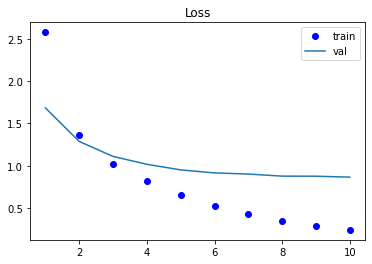

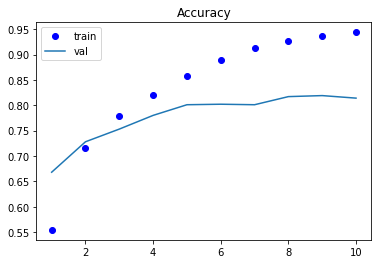

In [12]:
def history_plot(history_dict):

  keys = list(history_dict.keys())
  train_loss = history_dict[keys[0]]
  train_acc = history_dict[keys[1]]
  val_loss = history_dict[keys[2]]
  val_acc = history_dict[keys[3]]

  x = np.arange(1,len(train_loss)+1).astype('int8')

  plt.plot(x, train_loss, 'bo', label='train')
  plt.plot(x, val_loss, label='val')
  plt.title('Loss')
  plt.legend()
  plt.show()

  plt.plot(x, train_acc, 'bo', label='train')
  plt.plot(x, val_acc, label='val')
  plt.title('Accuracy')
  plt.legend()
  plt.show()

history_plot(history.history)

무작위로 분류할 경우 18%정도의 정확도를 가지므로 이에 비하면 결과가 좋음

In [13]:
import copy
test_labels_copy = copy.copy(test_labels)
# test_labels_copy = test_labels.copy() 
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array)/len(test_labels)))

0.19723953695458593


### 3.5.6 레이블과 손실을 다루는 다른 방법
원핫인코딩이 되어있지 않은 레이블을 입력하고 싶다면
loss를 'sparse_categorical_crossentropy'로 설정하면 된다.

```
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
              loss='sparse_categoriccal_crossentropy',
              metrics=['accuracy'])

```

### 3.5.7 충분히 큰 중간층을 두어야 하는 이유
마지막 출력이 46이기 때문에 중간층을 이보다 큰 64차원으로 설정   
만약 46차원보다 더 작은 중간층이 있는 경우, 즉 정보의 병목이 있는 경우 성능이 떨어진다.  
많은 정보를 중간층의 저차원 교현 공간으로 압축하려고했기 때문에 정보의 손실이 발생한다.

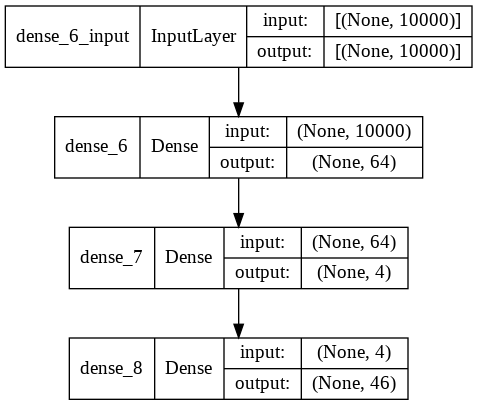

In [15]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

plot_model(model, show_shapes=True)

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 0.3793 - accuracy: 0.8931 - val_loss: 2.0286 - val_accuracy: 0.7000
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 0.3569 - accuracy: 0.8979 - val_loss: 2.0410 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 0.3484 - accuracy: 0.9008 - val_loss: 2.0865 - val_accuracy: 0.6970
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.3421 - accuracy: 0.9013 - val_loss: 2.1258 - val_accuracy: 0.6930
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.3385 - accuracy: 0.9050 - val_loss: 2.1149 - val_accuracy: 0.7010
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.3316 - accuracy: 0.9069 - val_loss: 2.1830 - val_accuracy: 0.6990
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.3252 - accuracy: 0.9088 - val_loss: 2.2115 - val_accuracy: 0.7000
Epoch 8/20
16

In [26]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 3.0239 - accuracy: 0.6834


[3.0239291191101074, 0.6834372282028198]